In [2]:
!pip install quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import quandl

In [3]:
import quandl
quandl.ApiConfig.api_key = '4PNpMrXyjmrx-y-iwdpi'

In [20]:
data = quandl.get('BSE/BOM500112', start_date='2023-01-01', end_date='2023-11-22')
data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2023-01-02,615.00,619.25,611.50,612.25,614.33,189984.0,4986.0,116712984.0,56159.0,29.56,7.75,-2.75
2023-01-03,612.55,616.65,610.05,612.35,613.59,322698.0,8607.0,198004631.0,114623.0,35.52,6.60,-0.20
2023-01-04,612.35,615.00,603.80,605.25,608.84,212339.0,4861.0,129280354.0,83458.0,39.30,11.20,-7.10
2023-01-05,607.90,611.50,602.05,605.20,606.19,319390.0,9502.0,193610242.0,98741.0,30.92,9.45,-2.70
2023-01-06,606.10,607.45,597.00,600.60,601.09,362496.0,12093.0,217893472.0,165774.0,45.73,10.45,-5.50


In [21]:
data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02,166.000000,1.660000e+02,1.660000e+02,166.000000,166.000000,166.000000
mean,568.037349,572.499699,561.723795,566.857530,567.170361,5.885730e+05,13304.909639,3.327325e+08,2.326867e+05,38.663494,10.775904,-1.179819
std,28.563443,28.023728,29.367931,28.283512,28.356207,4.246953e+05,9999.075370,2.385987e+08,1.947420e+05,12.854951,7.155781,7.766712
min,507.100000,512.000000,499.350000,505.600000,508.020000,1.382450e+05,4471.000000,8.284027e+07,4.177300e+04,13.190000,3.200000,-35.750000
25%,544.612500,553.050000,537.250000,544.112500,542.785000,3.230230e+05,7380.750000,1.835671e+08,1.092212e+05,29.625000,6.712500,-4.275000
50%,573.200000,575.325000,568.025000,572.450000,571.935000,4.406615e+05,10058.000000,2.476672e+08,1.655020e+05,35.430000,9.000000,-0.875000
75%,589.575000,593.612500,584.075000,588.137500,589.207500,6.744658e+05,15755.750000,3.732522e+08,2.792155e+05,47.940000,12.000000,3.137500
max,620.300000,621.500000,614.500000,620.100000,618.760000,2.741570e+06,65905.000000,1.594969e+09,1.249343e+06,76.630000,65.600000,19.900000


In [22]:
data.shape

(166, 12)

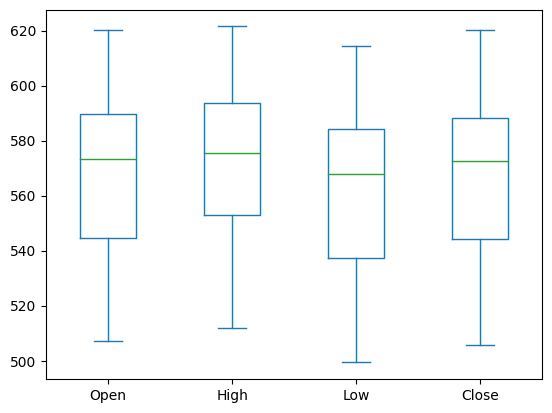

In [23]:
data[['Open', 'High', 'Low', 'Close']].plot(kind='box')
plt.show()

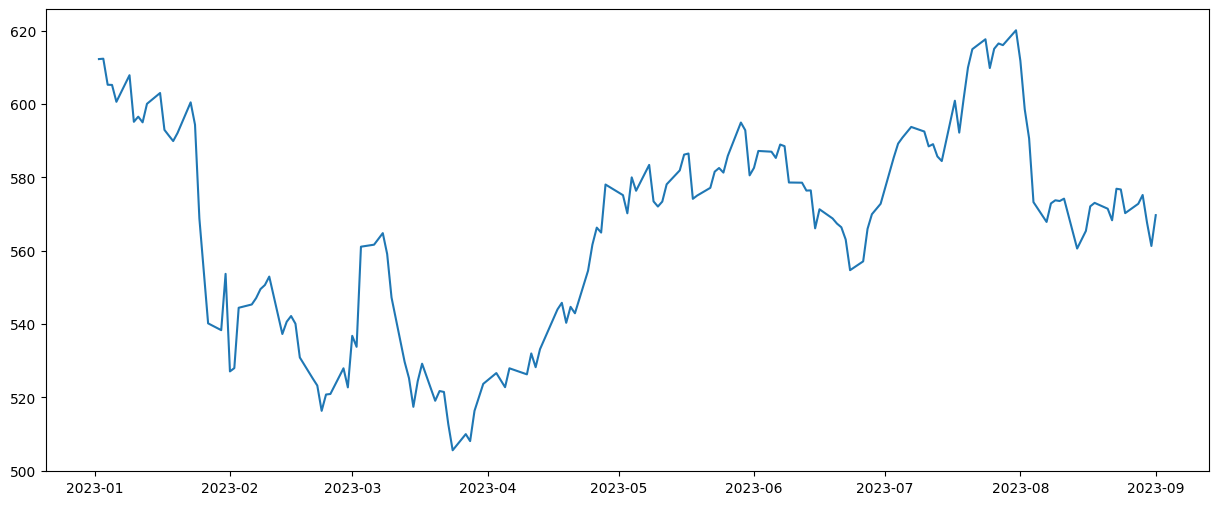

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(data['Close'])
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

new_data = data[['Open', 'High', 'Low', 'Close']]
new_data.head()

,Open,High,Low,Close
Date,,,,
2023-01-02,615.00,619.25,611.50,612.25
2023-01-03,612.55,616.65,610.05,612.35
2023-01-04,612.35,615.00,603.80,605.25
2023-01-05,607.90,611.50,602.05,605.20
2023-01-06,606.10,607.45,597.00,600.60


In [26]:
x = new_data.drop('Close', axis=1)
y = new_data['Close']

In [27]:
# splitting into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

In [35]:
x_test

array([[ 0.58670484,  0.45277105,  0.5335686 ],
       [ 1.49941602,  1.69635863,  1.6123288 ],
       [-0.09211311,  0.27870468,  0.12432465],
       [-1.69771101, -1.83880376, -1.71299233],
       [ 0.45129297,  0.55326297,  0.62774608],
       [-0.47372839, -0.55394271, -0.97669569],
       [ 0.67111743,  0.58915295,  0.72363587],
       [ 0.3985351 ,  0.56402997,  0.44966503],
       [ 0.20333097,  0.14411728,  0.34007669],
       [ 0.44074139,  0.33433414,  0.54726714],
       [-1.33016451, -0.63648965, -1.26265276],
       [-1.13144319, -1.15868876, -1.00922972],
       [ 1.0544913 ,  1.05033911,  1.04726393],
       [-1.26861366, -1.37043961, -1.2284064 ],
       [-0.49834873, -0.50190225, -0.86197039],
       [-0.93975625, -0.99000589, -0.85340881],
       [ 0.62011816,  0.68246688,  0.64315694],
       [-1.7838822 , -1.54091698, -1.62737644],
       [ 0.42843122,  0.50122251,  0.63117071],
       [ 1.20573054,  1.16159802,  1.06438711],
       [-0.21345622, -0.18786498, -0.189

In [30]:
r2_score(y_test, y_pred)

0.9835683209217769

In [31]:
# get the r2_score for training set
r2_score(y_train, regressor.predict(x_train))

0.9918621498727734

In [32]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [33]:
prediction.head()

,Actual,Predicted
Date,,
2023-05-31,580.55,578.424639
2023-07-21,614.95,616.022969
2023-04-28,578.05,578.608526
2023-03-23,512.70,515.548978
2023-05-26,585.85,585.535750


In [44]:
mean = scaler.mean_
std = np.sqrt(scaler.var_)

In [54]:
input_data = np.array([[573.95, 576.25, 571.85]])
scaled_user_input = input_data.reshape(1, -1)

scaled_user_input = (input_data - mean) / std
# Assuming model is your trained machine learning model
prediction = regressor.predict(scaled_user_input)


In [55]:
prediction[0]

573.4644508958601